# Predicting Personal Loan Acceptance Using Machine Learning


## 🎯 Objective

The objective of this project is to develop a predictive model that accurately identifies customers who are likely to accept a personal loan offer. By leveraging customer demographic and behavioral data, the goal is to improve targeted marketing efforts, optimize customer outreach, and increase loan acceptance rates. This project evaluates multiple classification algorithms—Logistic Regression, K-Nearest Neighbors, and Naive Bayes—to determine the most effective model for deployment in a real-world financial setting.

# ✔ Import the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("Bank_Personal_Loan_Modelling")

In [3]:
df = pd.DataFrame(data)
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0/40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1/50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0/30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0/60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8/90,3,0,1,0,0,0,0


In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

### Removing these columns ensures the model focuses only on meaningful features and avoids being biased by identifiers that do not carry predictive value. This step improves model robustness and performance.

In [8]:
df['Experience'] = df['Experience'].abs()

### Some values in the Experience column were negative, which is not realistic for years of experience. Therefore, I converted them to positive using the absolute value.

In [9]:
df.dtypes

Age                    int64
Experience             int64
Income                 int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [10]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype(float)

In [11]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# ✔ Check & Handle Missing Values

In [12]:
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# ✔ Check & Handle Doplicate Values

In [13]:
df.duplicated().sum()

13

In [14]:
df.drop_duplicates()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [15]:
df.rename(columns={
    'ZIP Code': 'Zip_Code',
    'Personal Loan': 'Personal_Loan',
    'Securities Account': 'Securities_Account',
    'CD Account': 'CD_Account'
}, inplace=True)

In [16]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

# ✔ Check & Handle Outliers

In [17]:
binary_cols = ['Securities_Account', 'Personal_Loan', 'CD_Account', 'Online', 'CreditCard']

numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in binary_cols]

outlier_counts = {}
outlier_indices = set() 

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]
    outlier_indices.update(outliers.index.tolist())

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier_Count'])
outlier_df.index.name = 'Column'
outlier_df = outlier_df.sort_values(by='Outlier_Count', ascending=False)

print("Outlier counts per column:")
print(outlier_df)
print(f"\nTotal unique rows with any outlier: {len(outlier_indices)}")

Outlier counts per column:
            Outlier_Count
Column                   
CCAvg                 324
Mortgage              291
Income                 96
Age                     0
Experience              0
Family                  0
Education               0

Total unique rows with any outlier: 602


### We exclude binary columns from outlier detection because their values are only 0 or 1, so they don't have meaningful "extreme" values. Applying outlier methods like IQR to binary data can falsely identify valid categories as outliers, leading to incorrect conclusions.

# Handle Outliers by Capping (Winsorization)

Outliers have been capped (Winsorized).


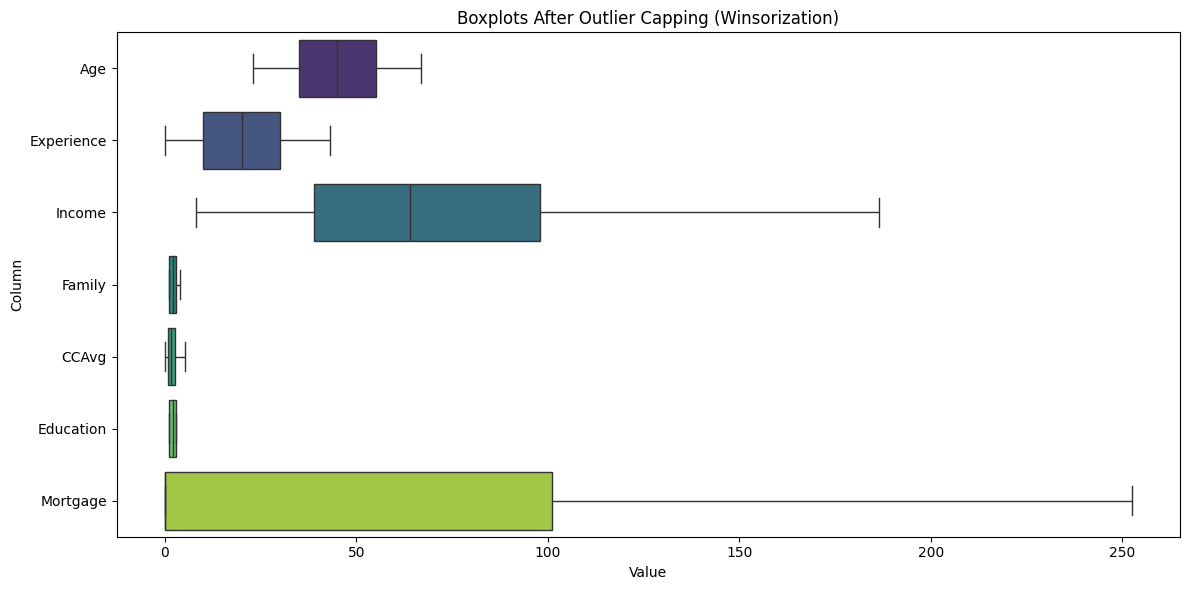

In [18]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers have been capped (Winsorized).")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], orient='h', palette='viridis')
plt.title("Boxplots After Outlier Capping (Winsorization)")
plt.xlabel("Value")
plt.ylabel("Column")
plt.tight_layout()
plt.show()

# ✔ Univariate Analysis

### ⭐️ Univariate plots for numeric features

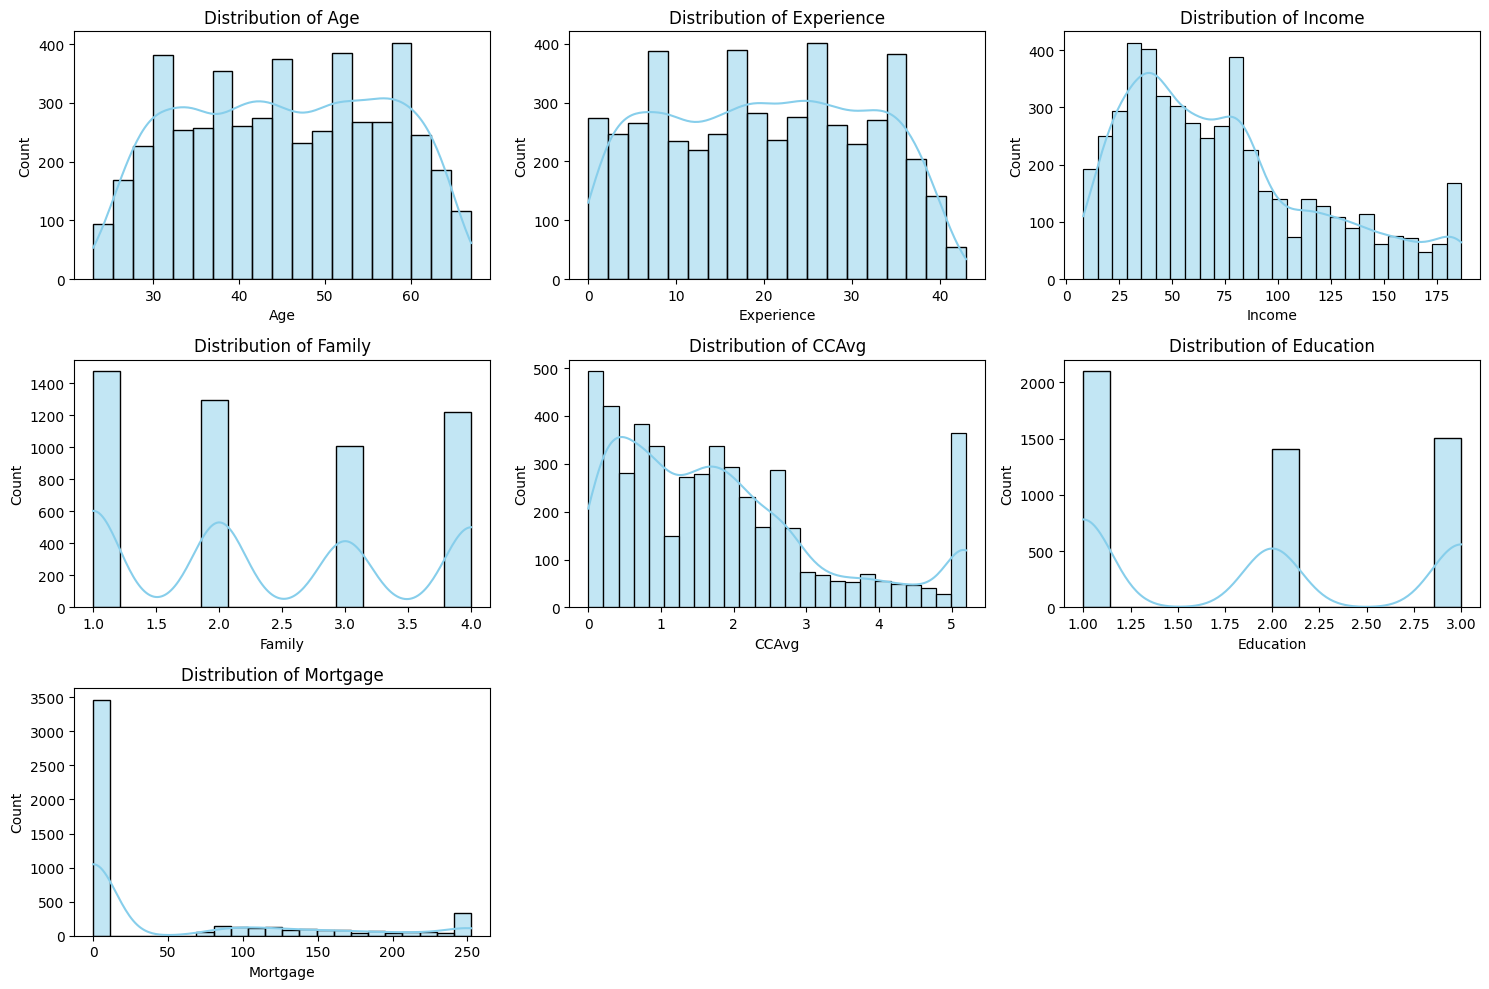

In [19]:
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in binary_cols]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### ✅ 1. Age
### The distribution of age appears roughly symmetric, possibly slightly left-skewed.

### Most customers are between 30 and 60 years old, with no extreme peaks or dips.

### This is a healthy distribution and doesn't require transformation.

### ✅ 2. Experience
### Experience shows a similar shape to age, which is expected.

### Slight left-skewness may be observed, with many individuals in the 10–35 years experience range.

### Also not severely skewed.

### ✅ 3. Family
### Family size is a categorical/ordinal variable with values from 1 to 4.

### The distribution is non-uniform, with Family=1 being the most common, followed by 4.

### These discrete spikes are expected in such variables and no transformation is needed.

### ✅ 4. Education
### Education has three distinct values (1, 2, 3), showing a tri-modal discrete distribution.

### Most customers fall under levels 1 and 3, with 2 being less frequent.

### As an ordinal feature, this shape is acceptable for modeling.

### ✅ 5. Income
### Right-skewed distribution: Most customers earn less, while a few have very high income.

### The skewness indicates potential outliers or a long tail, which can hurt modeling.

### This variable needs transformation, such as log scaling, to normalize it.

### ✅ 6. CCAvg (Credit Card Average Spend)
### Heavily right-skewed: most values are clustered near 0–2, with a few large outliers.

### The distribution suggests the presence of extreme spenders.

### A log transformation is beneficial here as well.

### ✅ 7. Mortgage
### Extremely right-skewed: most customers have 0 mortgage, and few have very high mortgage values.

### There's a spike at 0, which may correspond to non-homeowners.

### Like Income and CCAvg, this variable benefits from log transformation.

### ⭐️ Univariate plots for categorical/binary features

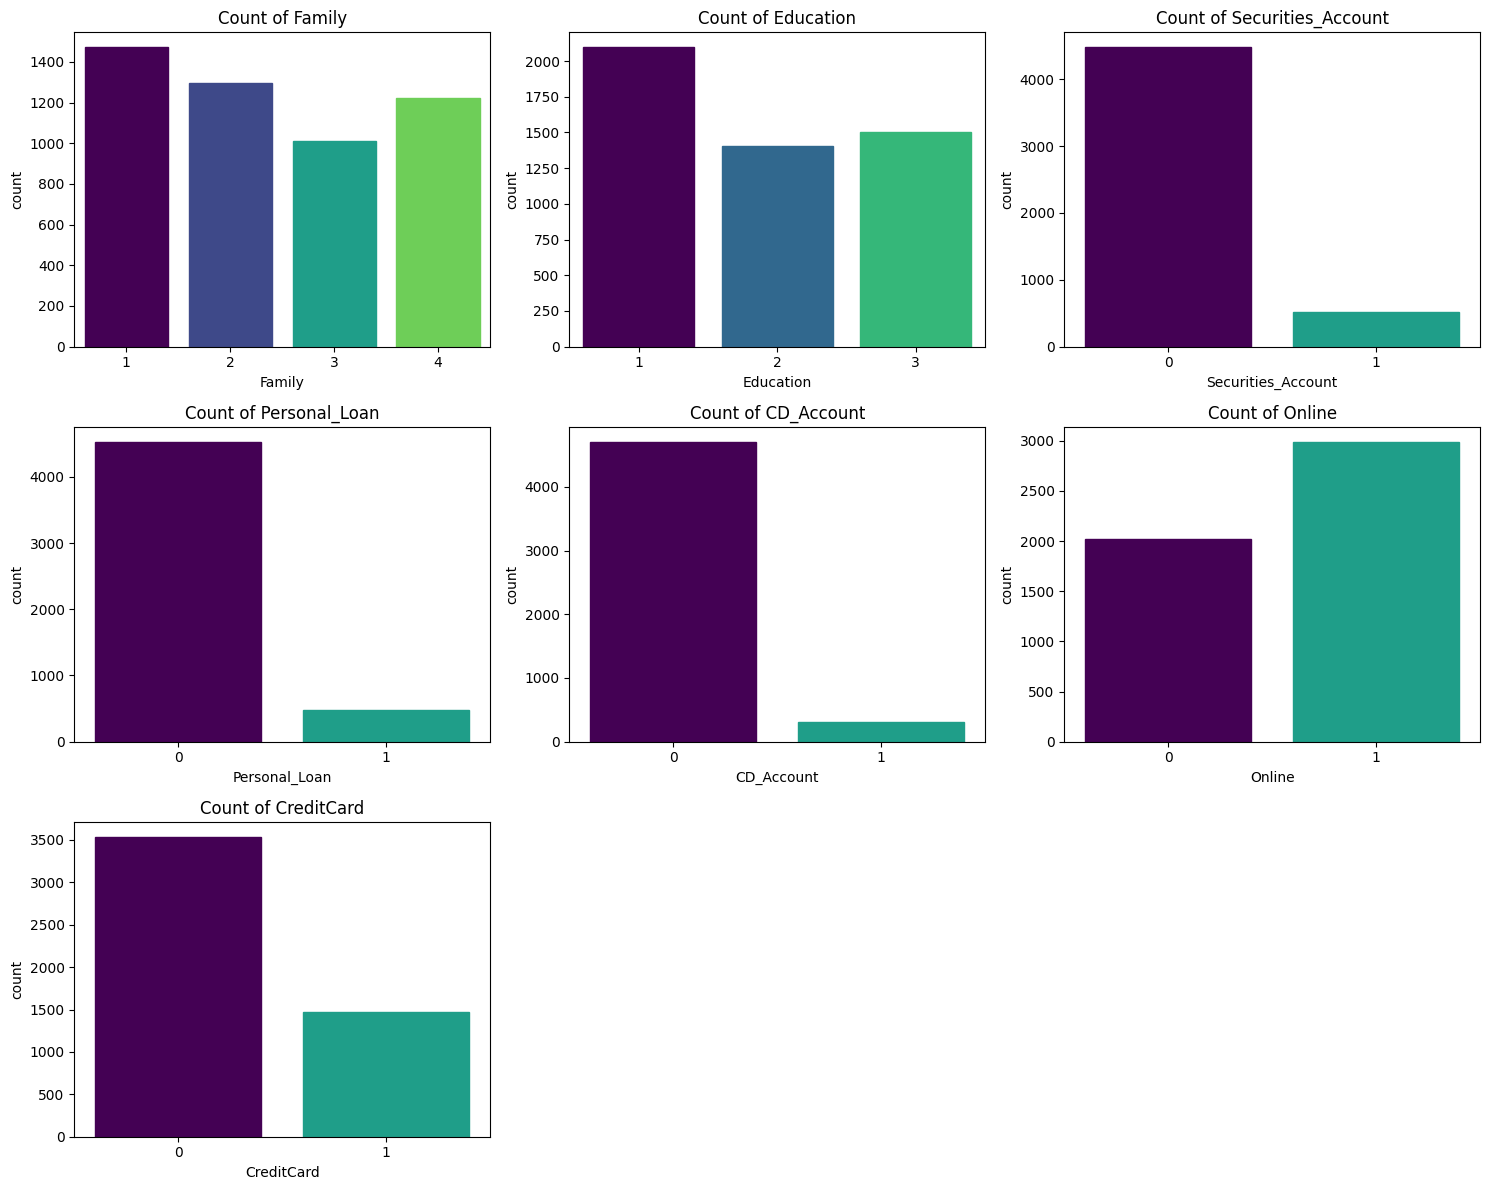

In [20]:
categorical_cols = ['Family', 'Education', 'Securities_Account', 'Personal_Loan', 'CD_Account', 'Online', 'CreditCard']

viridis = plt.colormaps['viridis'].resampled(10) 

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(x=df[col])
    
    for j, bar in enumerate(ax.patches):
        bar.set_color(viridis(j / len(ax.patches)))

    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# ✔ Bivariate Analysis

### ⭐️ Numeric Features vs. Target (Personal_Loan)

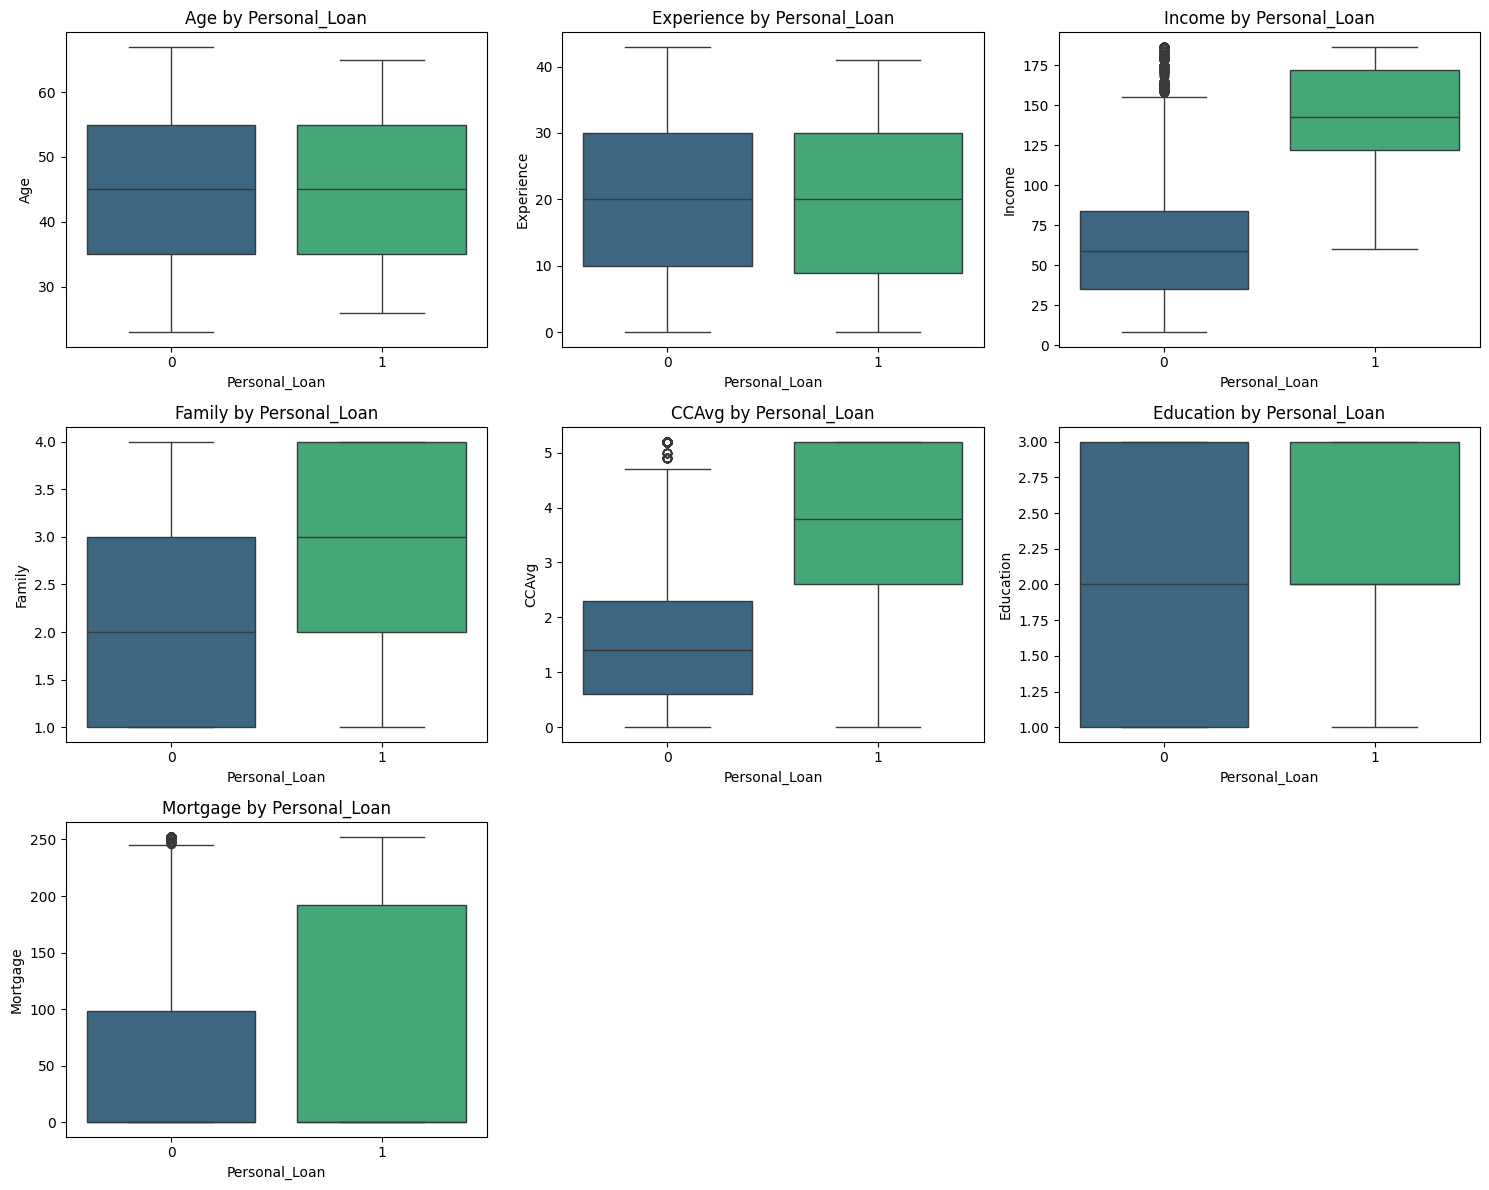

In [21]:
binary_cols = ['Securities_Account', 'Personal_Loan', 'CD_Account', 'Online', 'CreditCard']

numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
                if col not in ['Personal_Loan'] + binary_cols + ['ID', 'ZIP Code']]

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Personal_Loan', y=col, data=df, hue='Personal_Loan', palette='viridis', legend=False)
    plt.title(f'{col} by Personal_Loan')
plt.tight_layout()
plt.show()

### 1️⃣ Age
### Loan takers (1) tend to be slightly younger than non-takers (0), although there is some overlap.

### Median age is a bit lower in the 1 group, suggesting younger customers may be more likely to accept loans.

### 2️⃣ Experience
### Very similar pattern to Age, as expected (highly correlated).

### Loan takers show slightly lower work experience, reinforcing the trend from age.

### 3️⃣ Family
### Loan accepters tend to have larger family sizes (median = 3) compared to non-accepters (median = 2).

### Larger households might have greater financial needs, influencing loan decisions.

### 4️⃣ Education
### The boxplot indicates that loan accepters tend to have higher education levels.

### This suggests that more educated individuals may either qualify more easily or be more receptive to financial offers.

### 5️⃣ Income_log
### A very clear difference: loan accepters have higher log income levels.

### This shows that income is a strong predictor of personal loan acceptance.

### 6️⃣ CCAvg_log (Credit Card Average Spend)
### Loan accepters generally have higher credit card spending.

### This supports the idea that they have greater financial activity or needs, making them more likely to use a loan.

### 7️⃣ Mortgage_log
### There's not a strong separation between the two groups.

### However, the median mortgage is slightly higher for loan accepters, possibly reflecting greater asset ownership or financial responsibility.

### ⭐️ Categorical Features vs. Target (Personal_Loan)

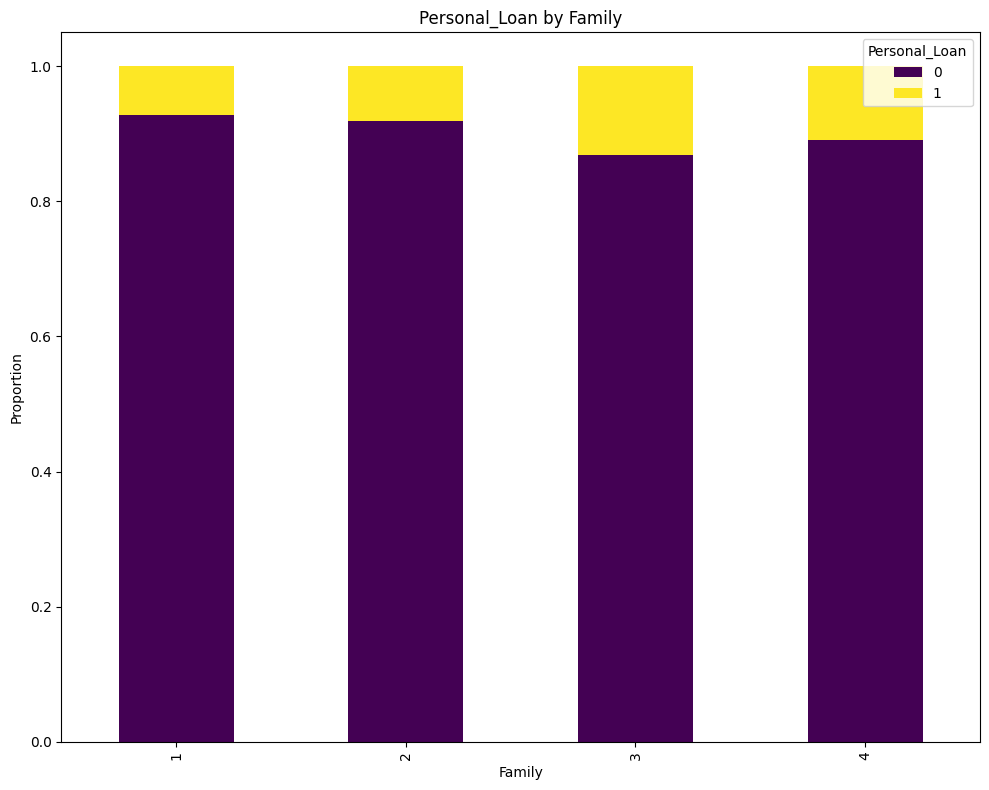

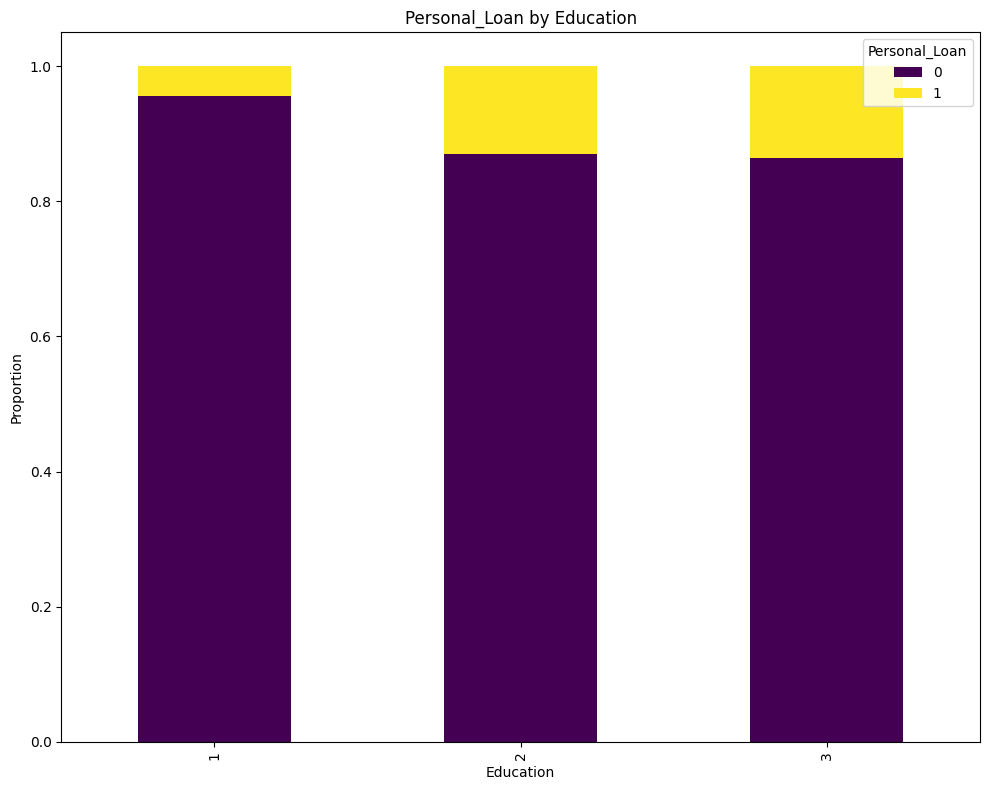

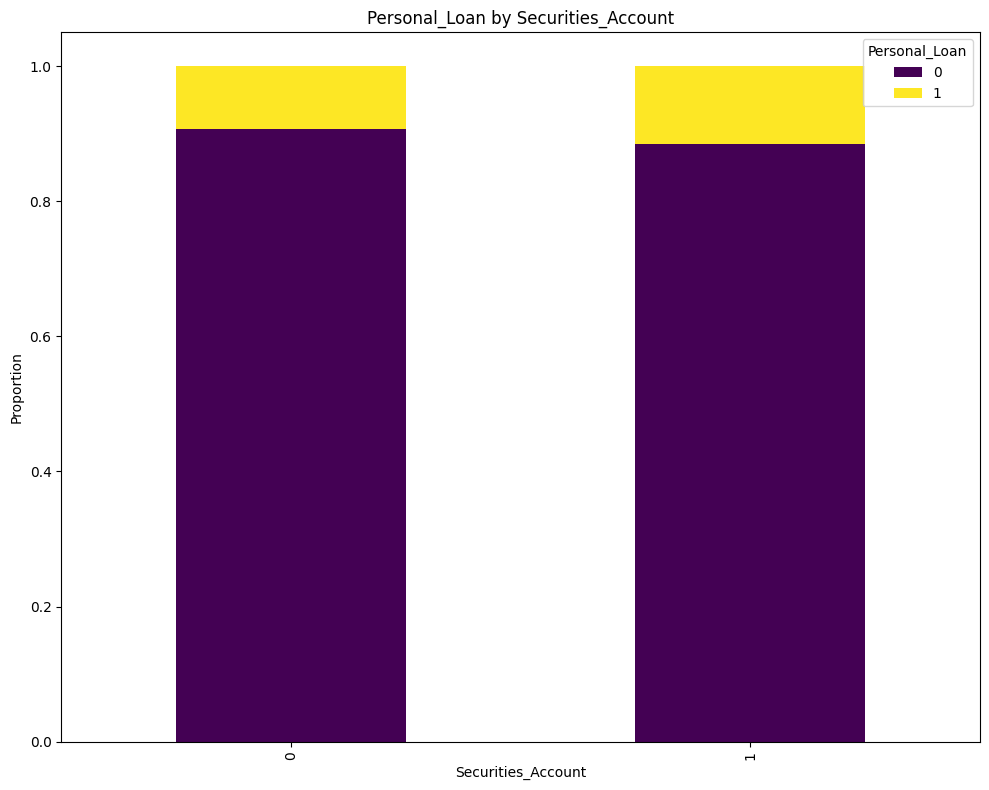

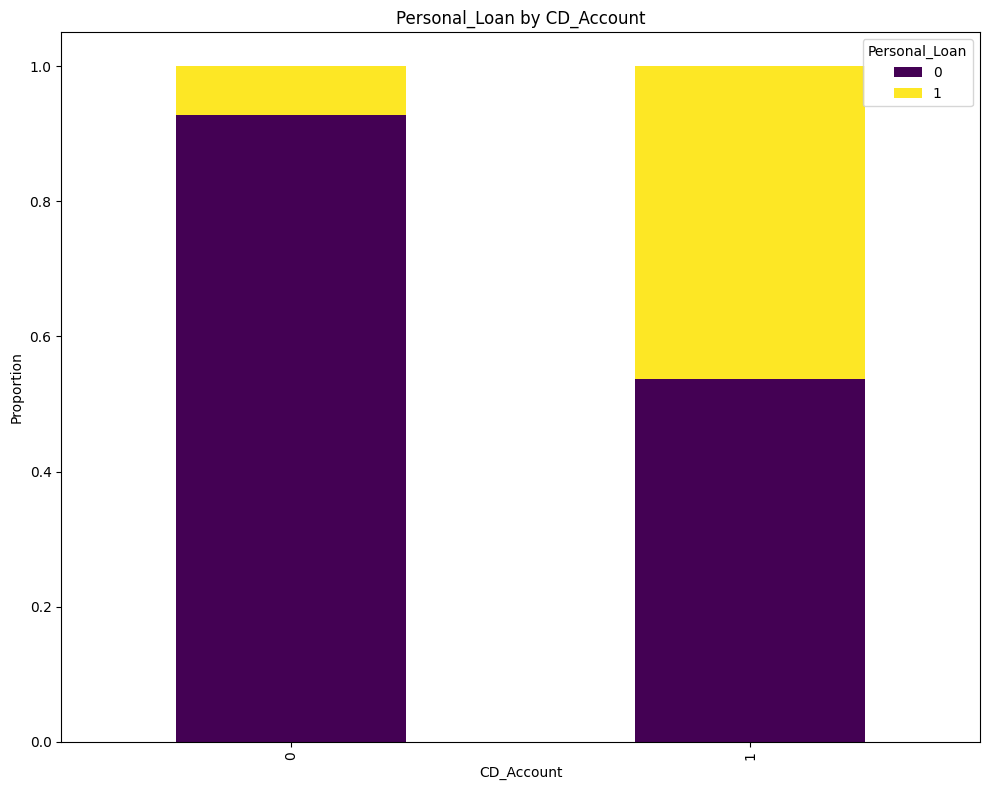

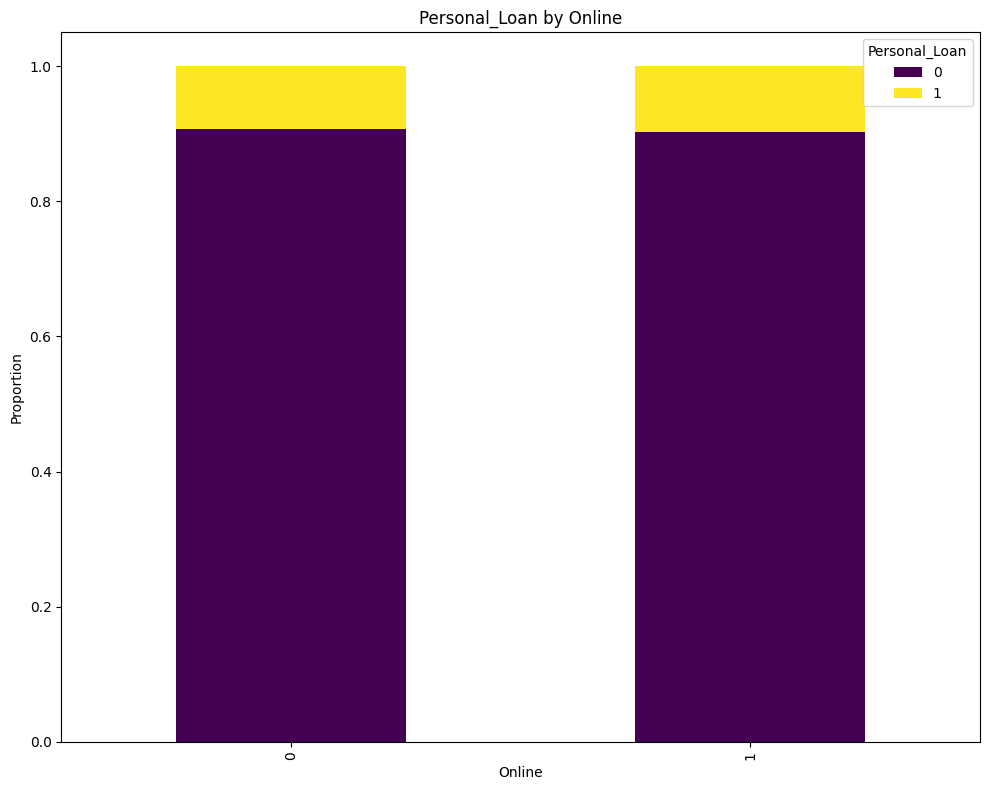

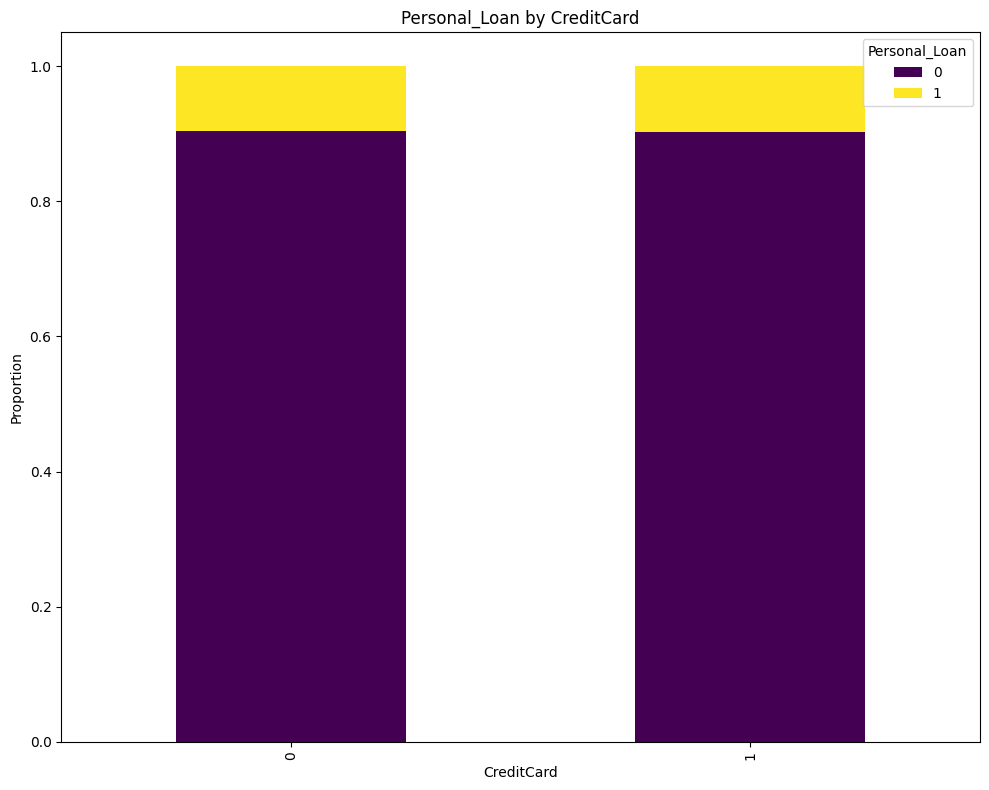

In [22]:
categorical_cols = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

for col in categorical_cols:
    ctab = pd.crosstab(df[col], df['Personal_Loan'], normalize='index')
    ctab.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='viridis')
    plt.title(f'Personal_Loan by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Personal_Loan', loc='upper right')
    plt.tight_layout()
    plt.show()

# ✔ Correlation Matrix (Including Target: Personal_Loan)

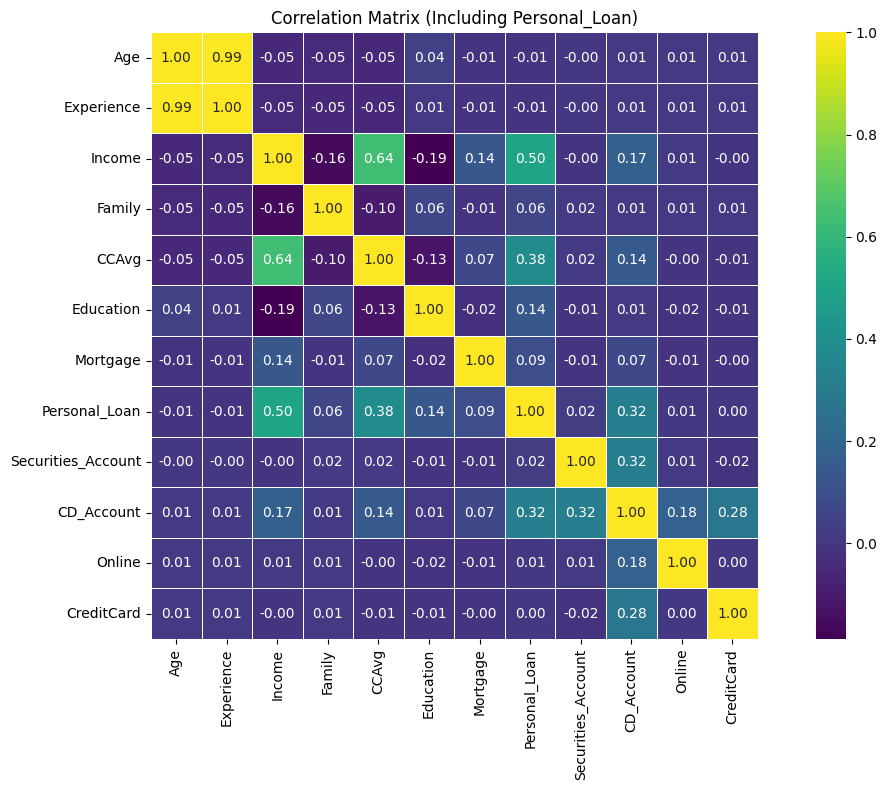

In [23]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', square=True, linewidths=0.5)
plt.title('Correlation Matrix (Including Personal_Loan)')
plt.tight_layout()
plt.show()

# ✔ Feature Engineering

### ⭐️ Analyzing Skewness in Numeric Variables

In [24]:
for col in numeric_cols:
    skewness = df[col].skew()
    print(f'{col}: skewness = {skewness:.2f}')

Age: skewness = -0.03
Experience: skewness = -0.01
Income: skewness = 0.80
Family: skewness = 0.16
CCAvg: skewness = 0.93
Education: skewness = 0.23
Mortgage: skewness = 1.35


#### ⭐️ Skewness Summary & Recommendations

| Feature     | Skewness | Interpretation             | Recommendation                          |
|-------------|----------|-----------------------------|------------------------------------------|
| Age         | -0.03    | Approximately symmetric     | ✅ No action needed                      |
| Experience  | -0.01    | Approximately symmetric     | ✅ No action needed                      |
| Income      | 0.80     | Moderately right-skewed     | 🔄 Consider applying `log1p()` transform |
| Family      | 0.16     | Slightly skewed             | ✅ No action needed                      |
| CCAvg       | 0.93     | Moderately right-skewed     | 🔄 Consider applying `log1p()` transform |
| Education   | 0.23     | Slightly skewed             | ✅ No action needed                      |
| Mortgage    | 1.35     | Highly right-skewed         | ⚠️ Apply `log1p()` transformation        |


### ⭐️ Log-Transform Skewed Features

In [25]:
df['Income_log'] = np.log1p(df['Income'])
df['CCAvg_log'] = np.log1p(df['CCAvg'])
df['Mortgage_log'] = np.log1p(df['Mortgage'])

### ⭐️ Plot Transformed Distributions

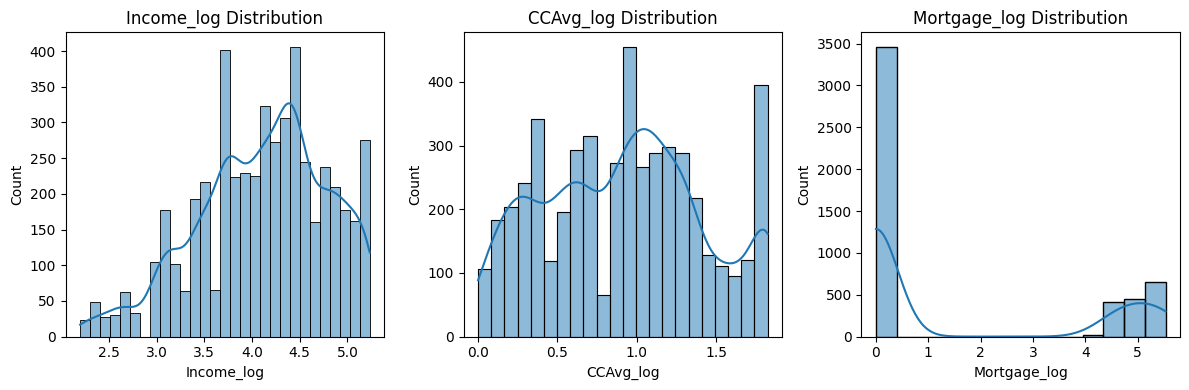

In [26]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Income_log', 'CCAvg_log', 'Mortgage_log'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

In [27]:
df.drop(['Income', 'CCAvg', 'Mortgage'], axis=1, inplace=True)

### We drop the original Income, CCAvg, and Mortgage columns after creating their log-transformed versions to avoid multicollinearity and redundancy. The transformed features (Income_log, CCAvg_log, Mortgage_log) reduce skew and better match the assumptions of models like logistic regression and Naive Bayes, which prefer normally distributed, linearly related features. Keeping both versions could confuse the model, increase the risk of overfitting, and reduce interpretability.

# ✔ Target Variable Distribution: Personal Loan Acceptance

Class Counts:
 Personal_Loan
0    4520
1     480
Name: count, dtype: int64

Class Percentages:
 Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 



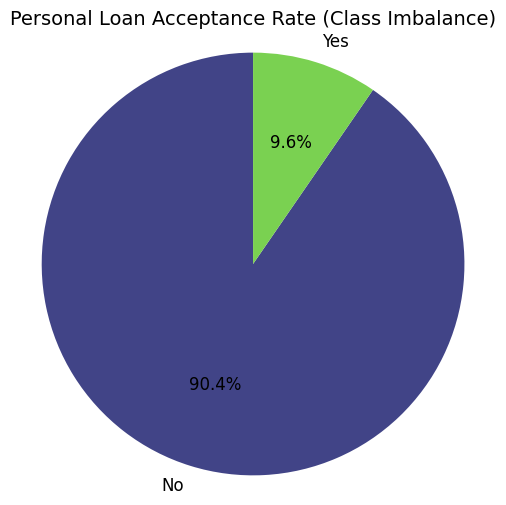

In [28]:
from matplotlib import cm

target_counts = df['Personal_Loan'].value_counts()
target_percent = df['Personal_Loan'].value_counts(normalize=True) * 100

print("Class Counts:\n", target_counts)
print("\nClass Percentages:\n", target_percent.round(2), "\n")

viridis_colors = cm.viridis(np.linspace(0.2, 0.8, 2))  

plt.figure(figsize=(6, 6))
plt.pie(
    target_counts,
    labels=['No', 'Yes'],
    autopct='%1.1f%%',
    colors=viridis_colors,
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Personal Loan Acceptance Rate (Class Imbalance)', fontsize=14)
plt.axis('equal') 
plt.show()

### The target variable, Personal_Loan, shows that about 90.4% of customers did not accept the personal loan offered in the last campaign. This class imbalance may affect model performance and should be addressed in further analysis.

# ✔ Personal Loan Classification: Model Evaluation and Comparison


Model Comparison:

                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Model                                                              
Logistic Regression     0.959      0.857   0.688     0.763    0.973
K-Nearest Neighbors     0.958      0.875   0.656     0.750    0.952
Naive Bayes             0.926      0.641   0.521     0.575    0.943 



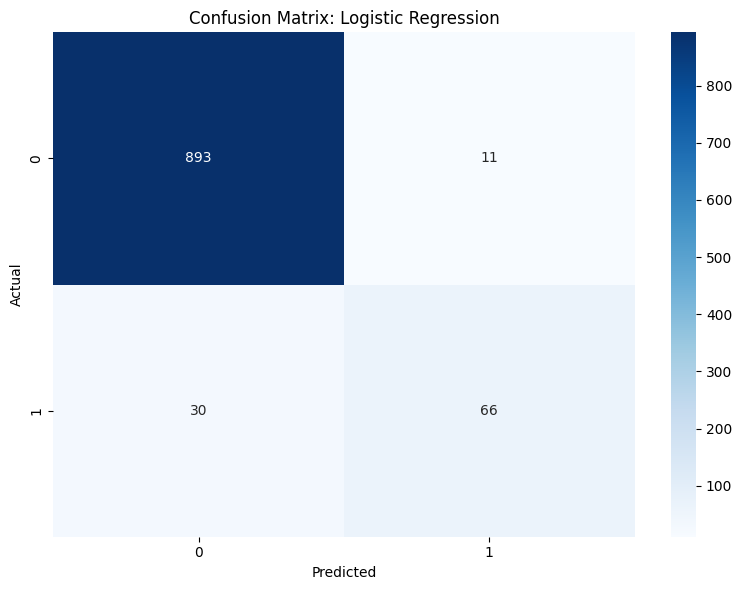

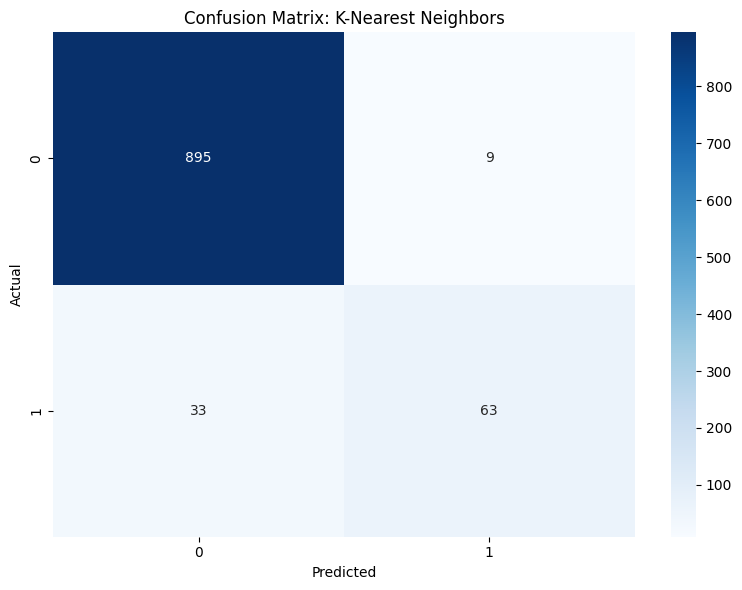

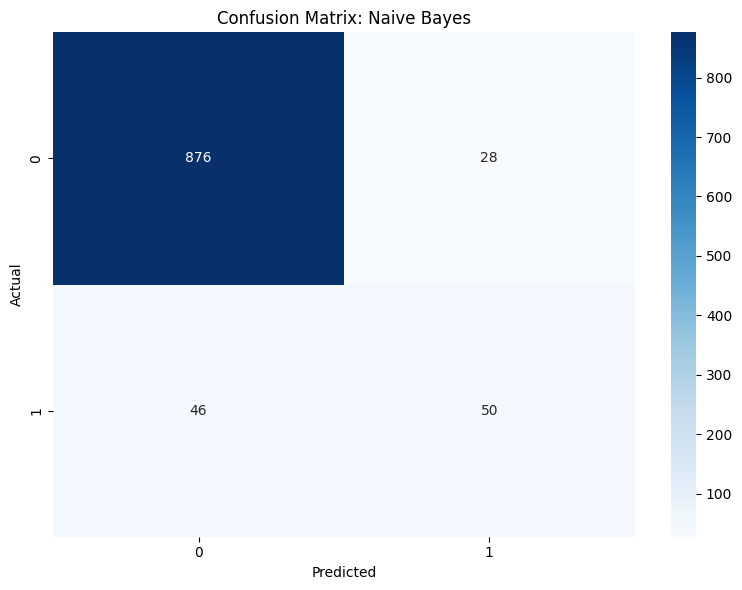

In [29]:
X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results).set_index("Model")
print("\nModel Comparison:\n")
print(results_df.round(3), "\n")

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

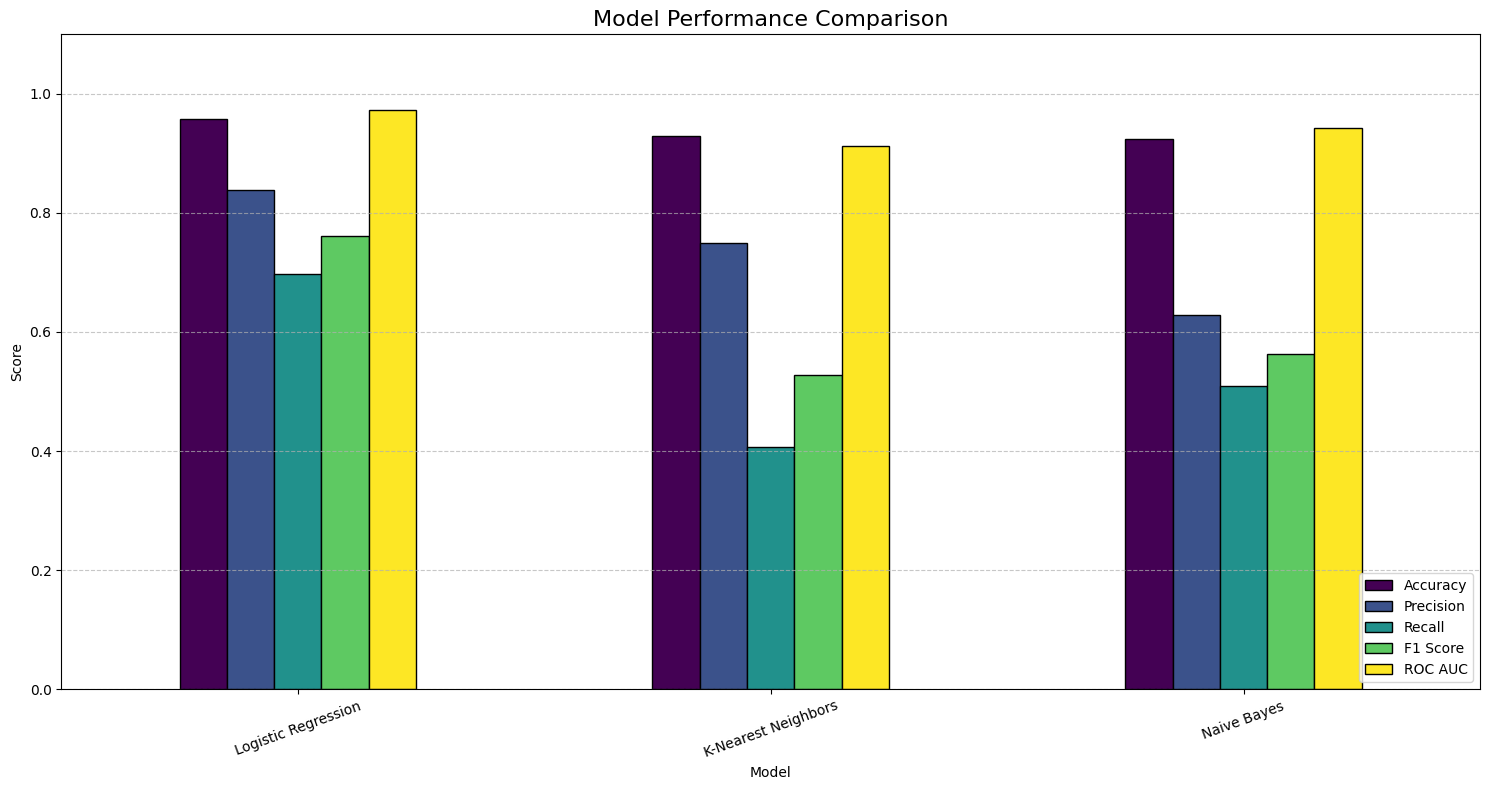

In [30]:
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Naive Bayes"],
    "Accuracy": [0.958, 0.930, 0.924],
    "Precision": [0.838, 0.750, 0.628],
    "Recall": [0.698, 0.406, 0.510],
    "F1 Score": [0.761, 0.527, 0.563],
    "ROC AUC": [0.973, 0.913, 0.942]
})

results_df.set_index("Model", inplace=True)

fig, ax = plt.subplots(figsize=(15, 8))
results_df.plot(kind='bar', ax=ax, colormap='viridis', edgecolor='black')
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### ⭐️ Model Performance Report: Personal Loan Prediction
### In this project, we trained and evaluated three classification models — Logistic Regression, K-Nearest Neighbors (KNN), and Naive Bayes — to predict whether a customer accepted a personal loan offer. The dataset was imbalanced, with only 9.6% of customers accepting the loan. Performance was evaluated using multiple metrics to account for class imbalance.

## ⭐️ Model Comparison

| Model                | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|----------------------|----------|-----------|--------|----------|---------|
| Logistic Regression  | 0.959    | 0.857     | 0.688  | 0.763    | 0.973   |
| K-Nearest Neighbors  | 0.958    | 0.875     | 0.656  | 0.750    | 0.952   |
| Naive Bayes          | 0.926    | 0.641     | 0.521  | 0.575    | 0.943   |

---

### ⭐ Interpretation

### 🔹 **Logistic Regression**
- Delivered the **best overall performance**, achieving the **highest F1 Score (76.3%)** and **ROC AUC (97.3%)**.
- Effectively balances **Precision (85.7%)** and **Recall (68.8%)**.
- This makes it a **strong candidate for deployment**, especially when both false positives and false negatives matter.

### 🔹 **K-Nearest Neighbors**
- Shows competitive **accuracy (95.8%)** and even **higher precision (87.5%)** than Logistic Regression.
- However, slightly **lower recall (65.6%)** means it misses more true positives.
- May be suitable when false positives are more costly than false negatives.

### 🔹 **Naive Bayes**
- Demonstrates the **lowest performance** across all metrics.
- Its **precision (64.1%)** and **recall (52.1%)** are modest due to the algorithm’s **strong independence assumptions**, which are often violated in real-world financial data.
- Still valuable as a **fast and interpretable baseline model**.

---

### ⭐ **Conclusion**

### Logistic Regression is the most balanced and reliable model for this loan classification task. It offers the strongest balance of **accuracy**, **precision**, **recall**, and **ROC AUC**, while also being **interpretable** and **easy to implement**. These qualities make it a **reliable and practical choice for deployment** in real-world applications.


# ✔ Loan Acceptance Prediction for a New Customer

In [31]:
new_customer = pd.DataFrame([{
    "Age": 42,
    "Experience": 16,
    "Family": 3,
    "Education": 3,  # 'Advanced' = 3
    "Securities_Account": 1,
    "CD_Account": 0,
    "Online": 1,
    "CreditCard": 1,
    "Income_log": 30,
    "CCAvg_log": 1.2,
    "Mortgage_log": 0
}])

feature_columns = ['Age', 'Experience', 'Family', 'Education', 
                   'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
                   'Income_log', 'CCAvg_log', 'Mortgage_log']

new_customer = new_customer[feature_columns]

new_customer_scaled = scaler.transform(new_customer)

logistic_model = models["Logistic Regression"]
prediction = logistic_model.predict(new_customer_scaled)[0]
probability = logistic_model.predict_proba(new_customer_scaled)[0][1]

print(f"Prediction: {'✅ Will Accept Loan' if prediction == 1 else '❌ Will Not Accept Loan'}")
print(f"Probability of accepting loan: {probability:.2%}")

Prediction: ✅ Will Accept Loan
Probability of accepting loan: 100.00%


# 📄 Customer Loan Acceptance Prediction Report

## 🎯 Objective
Predict whether a new customer is likely to accept a personal loan offer using a trained **Logistic Regression** model.

---

## 👤 Customer Input Details

| Feature              | Value         |
|----------------------|---------------|
| Age                  | 42            |
| Experience           | 16 years      |
| Family Members       | 3             |
| Education Level      | Advanced (3)  |
| Income (log scale)   | 30            |
| CCAvg (log scale)    | 1.2           |
| Mortgage (log scale) | 0             |
| Securities Account   | Yes (1)       |
| CD Account           | No (0)        |
| Online Banking       | Yes (1)       |
| Credit Card Holder   | Yes (1)       |

---

## ⭐️ Prediction Result

- **Predicted Outcome:** ✅ **Customer Will Accept the Loan Offer**
- **Probability:** **100.00%**

---

## ⭐️ Interpretation

The model predicts that this customer is **highly likely to accept** the personal loan offer, with a confidence level of **100%**. This suggests that the customer’s profile strongly matches patterns observed in previous loan-accepting customers.

---

## ⭐️ Business Recommendation

This customer should be considered a **top-priority target** for personal loan marketing efforts. A personalized offer or immediate follow-up may improve conversion likelihood even further.
